# Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, roc_curve, auc
import shap



# Data vizualisation

In [3]:
# save filepath to variable for easier access
game_players_stats_path = '../data/game_players_stats.csv'
# read the data and store data in DataFrame titled melbourne_data
game_players_stats_data = pd.read_csv(game_players_stats_path) 
pd.set_option('display.max_columns', None)
# print a summary of the data in Melbourne data
game_players_stats_data.describe()

,game_id,player_id,team_id,game_length,team_kills,tower_kills,inhibitor_kills,dragon_kills,herald_kills,baron_kills,player_kills,player_deaths,player_assists,total_minions_killed,gold_earned,level,total_damage_dealt,total_damage_dealt_to_champions,total_damage_taken,wards_placed,largest_killing_spree,largest_multi_kill
count,374554.000000,374554.000000,374554.000000,3.745540e+05,374554.000000,374554.000000,374554.000000,374554.000000,374554.000000,374554.000000,374554.000000,374554.000000,374554.000000,374554.000000,374554.000000,374554.000000,374554.000000,374554.000000,374554.000000,374554.000000,374554.000000,374554.000000
mean,18729.401448,1549.469631,283.521236,2.376872e+03,13.915163,6.018486,0.895227,2.262723,0.885904,0.696305,2.783038,2.788671,6.393858,204.271643,11472.205180,14.789699,155852.709826,13792.472418,19392.803756,20.362722,1.762427,1.060029
std,10813.836519,1234.016945,222.844447,3.202794e+04,7.267931,3.618850,1.065168,1.400929,0.759774,0.741653,2.683247,1.947362,4.446742,105.844330,3389.038142,2.184600,92223.609967,8750.449083,9394.270675,18.232569,2.250181,0.833039
min,0.000000,0.000000,0.000000,8.060000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1920.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9363.000000,480.000000,86.000000,1.682000e+03,8.000000,3.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,3.000000,147.000000,8911.000000,13.000000,102675.750000,7145.000000,12421.000000,10.000000,0.000000,1.000000
50%,18731.000000,1221.000000,221.000000,1.873000e+03,14.000000,7.000000,1.000000,2.000000,1.000000,1.000000,2.000000,3.000000,6.000000,220.000000,11243.000000,15.000000,158449.000000,12180.000000,17574.000000,14.000000,0.000000,1.000000
75%,28094.000000,2409.000000,449.000000,2.111000e+03,19.000000,9.000000,1.000000,3.000000,1.000000,1.000000,4.000000,4.000000,9.000000,277.000000,13635.000000,16.000000,209655.500000,18340.000000,24689.000000,21.000000,3.000000,1.000000
max,37458.000000,4952.000000,843.000000,2.793607e+06,79.000000,11.000000,10.000000,7.000000,3.000000,5.000000,28.000000,20.000000,35.000000,673.000000,31844.000000,18.000000,880083.000000,102344.000000,124663.000000,203.000000,22.000000,5.000000


# Data pre-processing

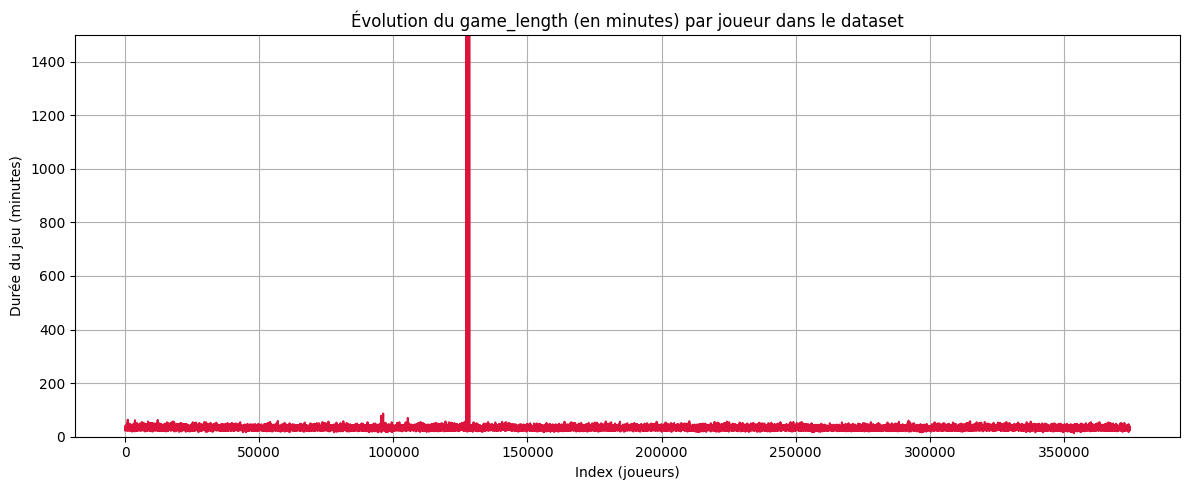

In [4]:
game_players_stats_data['game_length_min'] = game_players_stats_data['game_length'] / 60

# Plot brut de l'évolution du game_length
plt.figure(figsize=(12, 5))
plt.plot(game_players_stats_data['game_length_min'].values, linestyle='-', marker='', color='crimson')
plt.title("Évolution du game_length (en minutes) par joueur dans le dataset")
plt.xlabel("Index (joueurs)")
plt.ylabel("Durée du jeu (minutes)")
plt.ylim(0, 1500)
plt.grid(True)
plt.tight_layout()
plt.show()

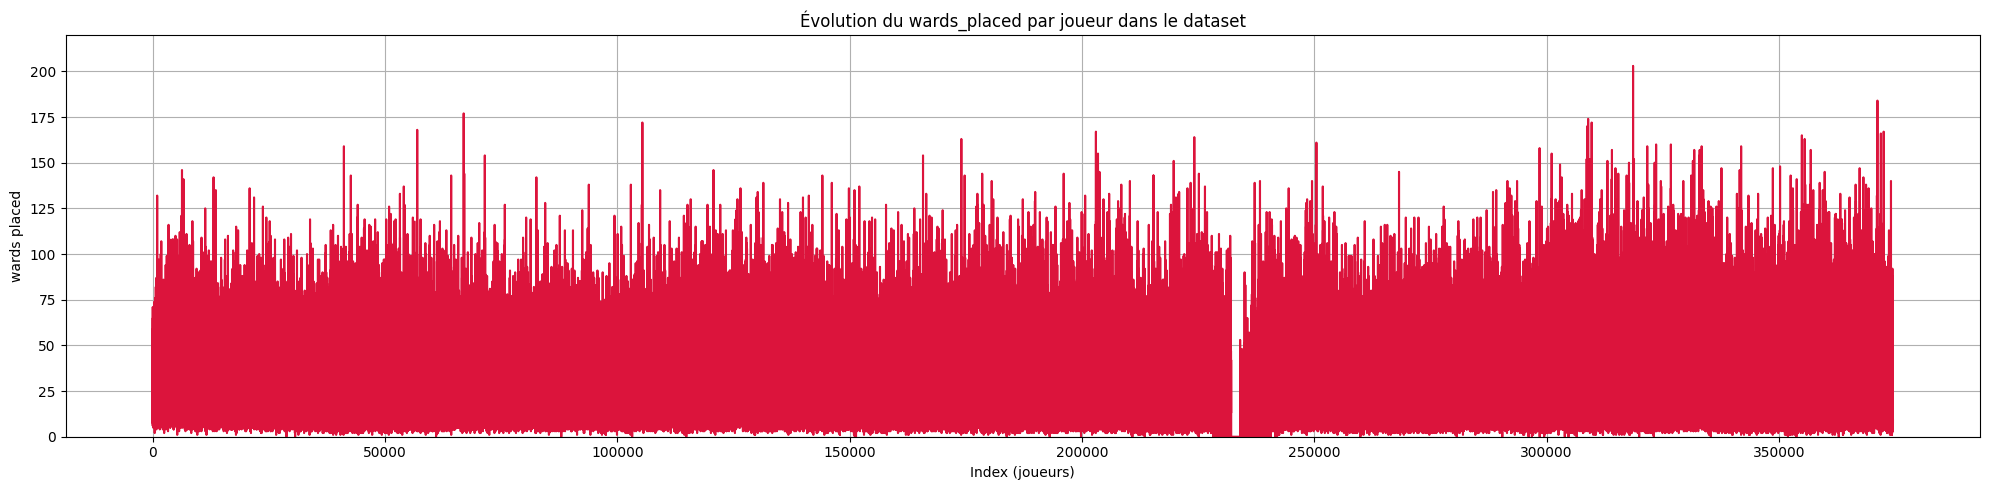

In [5]:


# Plot brut de l'évolution des wards placées
plt.figure(figsize=(20, 5))
plt.plot(game_players_stats_data['wards_placed'].values, linestyle='-', marker='', color='crimson')
plt.title("Évolution du wards_placed par joueur dans le dataset")
plt.xlabel("Index (joueurs)")
plt.ylabel("wards placed")
plt.ylim(0, 220)
plt.grid(True)
plt.tight_layout()
plt.show()

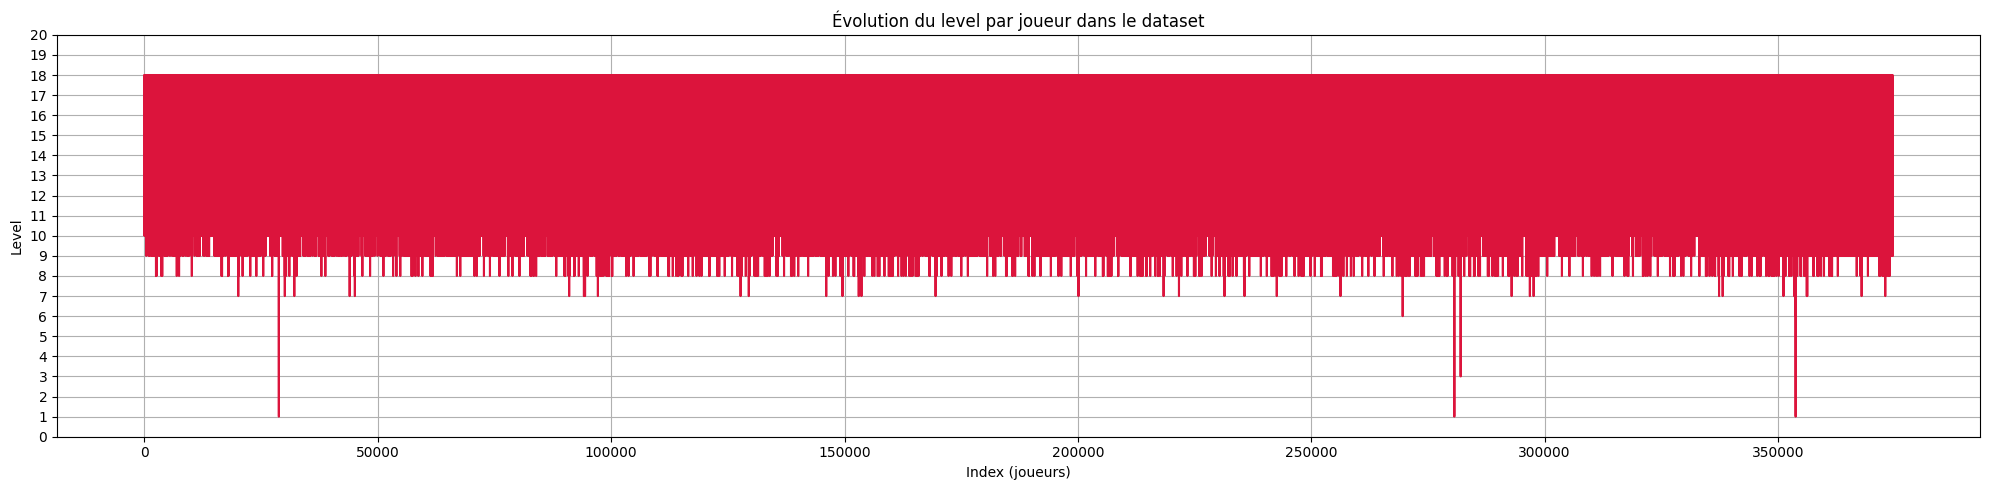

In [6]:



plt.figure(figsize=(20, 5))
plt.plot(game_players_stats_data['level'].values, linestyle='-', marker='', color='crimson')
plt.title("Évolution du level par joueur dans le dataset")
plt.xlabel("Index (joueurs)")
plt.ylabel("Level")

# Limites de l'axe Y et pas de 1
plt.ylim(0, 20)
plt.gca().yaxis.set_major_locator(MultipleLocator(1))

plt.grid(True)
plt.tight_layout()
plt.show()


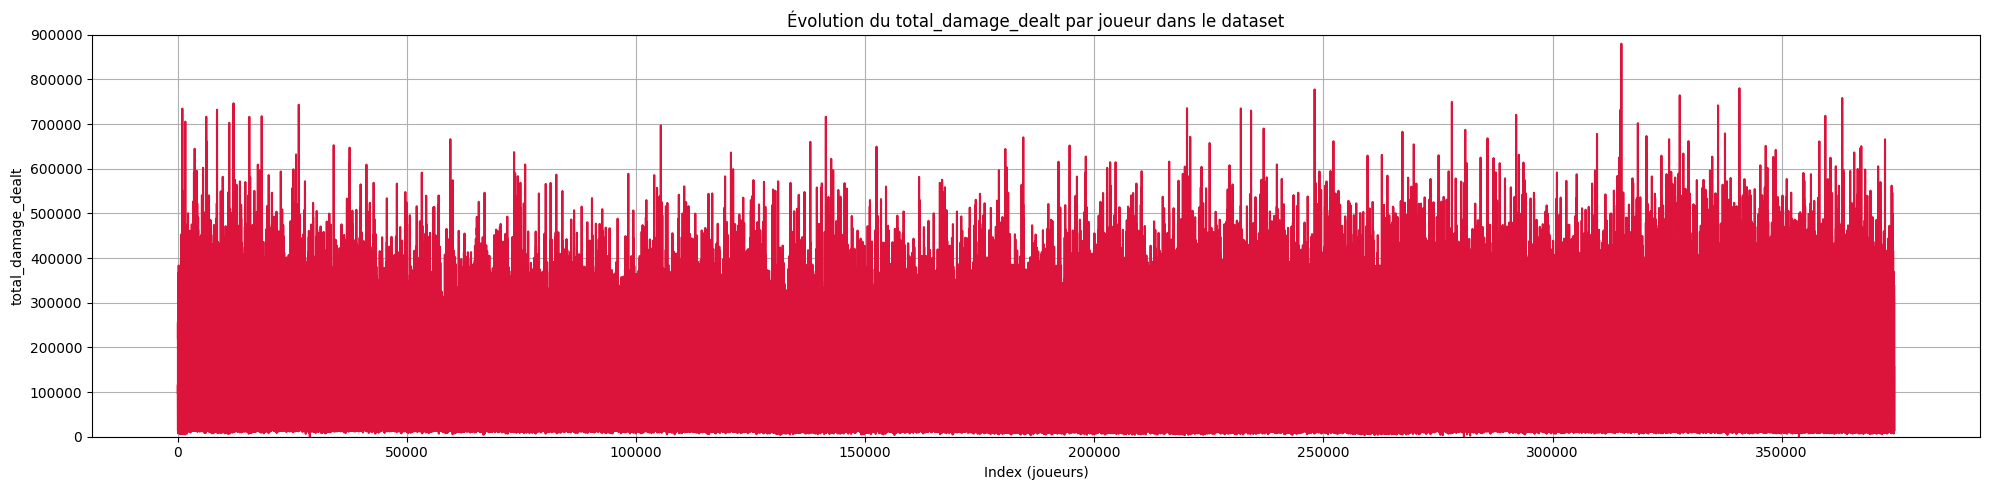

In [7]:
#total_damage_dealt, total_damage_dealt_to_champions, total_damage_taken

plt.figure(figsize=(20, 5))
plt.plot(game_players_stats_data['total_damage_dealt'].values, linestyle='-', marker='', color='crimson')
plt.title("Évolution du total_damage_dealt par joueur dans le dataset")
plt.xlabel("Index (joueurs)")
plt.ylabel("total_damage_dealt")
plt.ylim(0, 900000)
plt.grid(True)
plt.tight_layout()
plt.show()

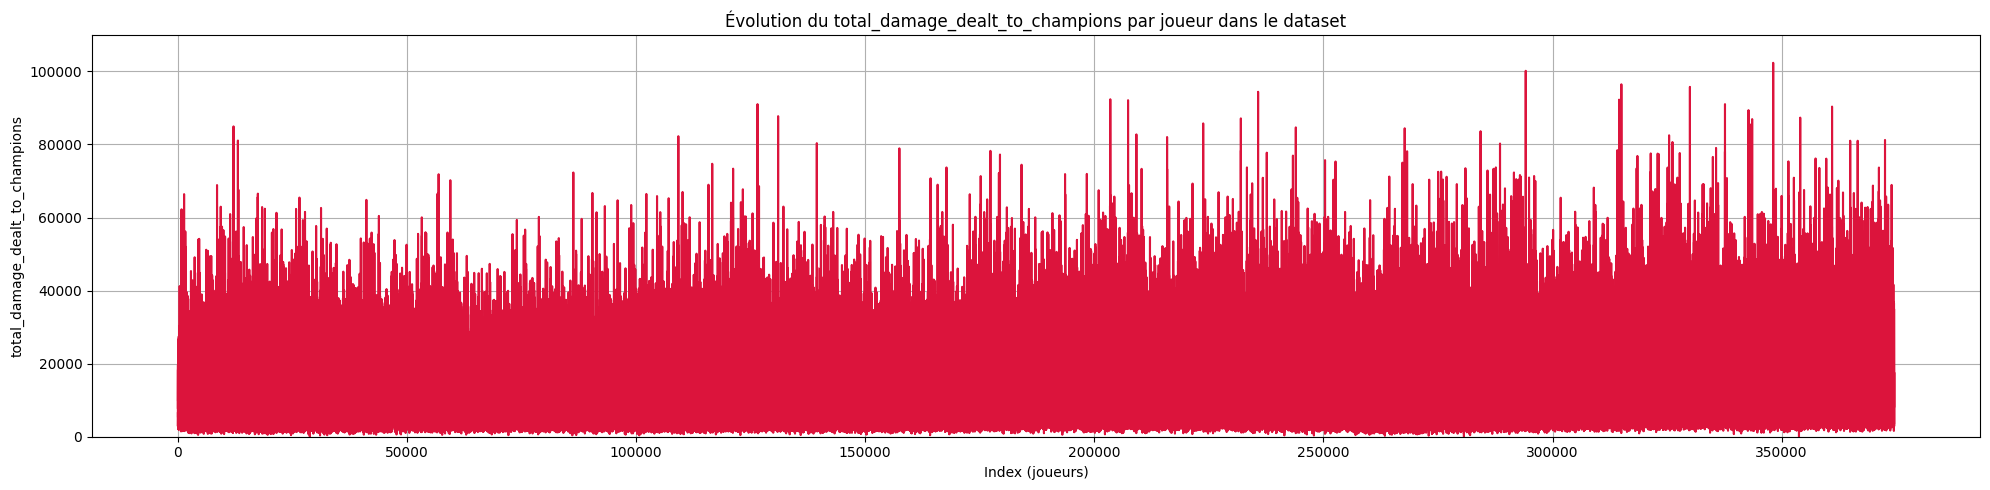

In [8]:
plt.figure(figsize=(20, 5))
plt.plot(game_players_stats_data['total_damage_dealt_to_champions'].values, linestyle='-', marker='', color='crimson')
plt.title("Évolution du total_damage_dealt_to_champions par joueur dans le dataset")
plt.xlabel("Index (joueurs)")
plt.ylabel("total_damage_dealt_to_champions")
plt.ylim(0, 110000)
plt.grid(True)
plt.tight_layout()
plt.show()

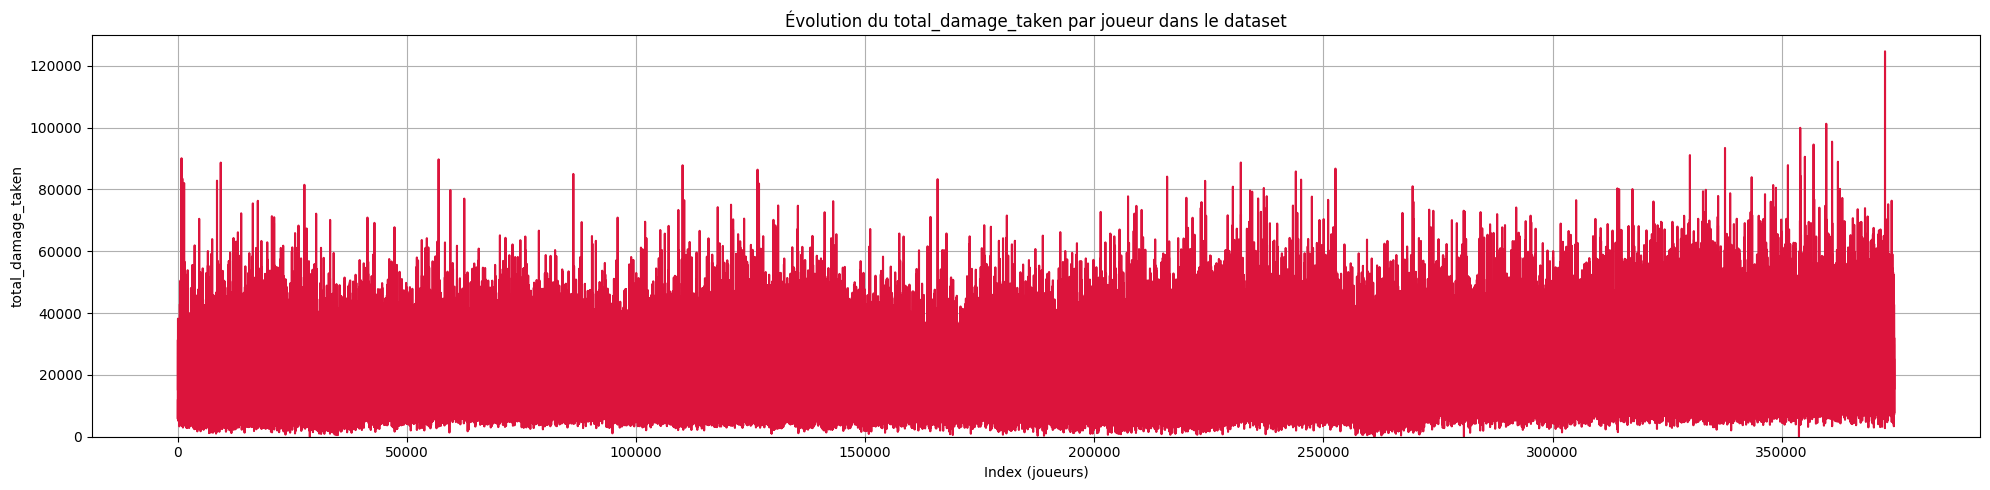

In [9]:
plt.figure(figsize=(20, 5))
plt.plot(game_players_stats_data['total_damage_taken'].values, linestyle='-', marker='', color='crimson')
plt.title("Évolution du total_damage_taken par joueur dans le dataset")
plt.xlabel("Index (joueurs)")
plt.ylabel("total_damage_taken")
plt.ylim(0, 130000)
plt.grid(True)
plt.tight_layout()
plt.show()

## Nettoyage des datas relatives aux wards placées

In [10]:

# # Masque des joueurs avec 0 ward
# mask_zero_wards = (game_players_stats_data['wards_placed'] == 0)

# # Création d'un groupe pour chaque séquence consécutive
# # Quand la valeur change (0 → autre ou autre → 0), on incrémente un groupe
# groups = (mask_zero_wards != mask_zero_wards.shift()).cumsum()

# # Groupes de 0 wards uniquement
# grouped = game_players_stats_data[mask_zero_wards].groupby(groups)

# # On filtre les groupes longs (ex : au moins 5 joueurs consécutifs avec 0 wards)
# sequences = [(group.index[0], group.index[-1], len(group)) for _, group in grouped if len(group) >= 10]

# # Affichage
# for start, end, length in sequences:
#     print(f"Bloc de {length} joueurs à 0 ward : index {start} → {end}")



# Chargement du dataset (si pas encore fait)
# game_players_stats_data = pd.read_csv(game_players_stats_path)

# Étape 1 : détecter les lignes avec 0 wards
mask_zero = (game_players_stats_data['wards_placed'] == 0)

# Étape 2 : détecter les groupes consécutifs (séquence logique)
group_id = (mask_zero != mask_zero.shift()).cumsum()

# Étape 3 : regrouper les blocs de zéros consécutifs
grouped = game_players_stats_data[mask_zero].groupby(group_id)

# Étape 4 : collecter les index des blocs suspects (≥ 10 joueurs consécutifs)
suspect_indexes = []
for _, group in grouped:
    if len(group) >= 10:
        suspect_indexes.extend(group.index)

# Étape 5 : suppression des lignes suspectes
print(f"Nombre de lignes à supprimer (blocs suspects) : {len(suspect_indexes)}")

# Dataset nettoyé
full_data_wards_cleaned = game_players_stats_data.drop(index=suspect_indexes).copy()

# Facultatif : reset index propre
full_data_wards_cleaned.reset_index(drop=True, inplace=True)

# Résultat final
print(f"Nombre de lignes après nettoyage : {len(full_data_wards_cleaned)}")



Nombre de lignes à supprimer (blocs suspects) : 7290
Nombre de lignes après nettoyage : 367264


## Nettoyage des datas relatives à la durée d'une game

In [11]:

# Masque des lignes anormales
mask_long = full_data_wards_cleaned['game_length'] > 9000

# Identifier les séquences (même méthode que pour wards_placed)
group_ids = (mask_long != mask_long.shift()).cumsum()

# Grouper les lignes où mask_long == True
grouped = full_data_wards_cleaned[mask_long].groupby(group_ids)

# Extraire les séquences suspectes (2 lignes ou plus d'affilée)
long_game_sequences = [(group.index[0], group.index[-1], len(group)) for _, group in grouped if len(group) >= 2]

# Afficher les séquences détectées
for start, end, size in long_game_sequences:
    print(f"Séquence de {size} lignes avec game_length > 150 min (9000 s) : index {start} → {end}")



Séquence de 30 lignes avec game_length > 150 min (9000 s) : index 127220 → 127249
Séquence de 30 lignes avec game_length > 150 min (9000 s) : index 128120 → 128149
Séquence de 20 lignes avec game_length > 150 min (9000 s) : index 128280 → 128299


In [12]:

# Définir les plages d’index concernés (ceux à corriger)
index_ranges = [
    range(127220, 127250),   # Séquence 1
    range(128120, 128150),   # Séquence 2
    range(128280, 128300)    # Séquence 3
]

# Fusionner tous les index dans une seule liste
all_suspicious_indexes = [i for r in index_ranges for i in r]

# S'assurer que la colonne accepte les floats
full_data_wards_cleaned['game_length'] = full_data_wards_cleaned['game_length'].astype('Int64')

# Appliquer la correction avec arrondi à l'entier supérieur
full_data_wards_cleaned.loc[all_suspicious_indexes, 'game_length'] = \
    np.ceil(full_data_wards_cleaned.loc[all_suspicious_indexes, 'game_length'] / 1000)

# Vérification de la correction
print(full_data_wards_cleaned.loc[all_suspicious_indexes, ['game_length']])


        game_length
127220         2794
127221         2794
127222         2794
127223         2794
127224         2794
...             ...
128295         2115
128296         2115
128297         2115
128298         2115
128299         2115

[80 rows x 1 columns]


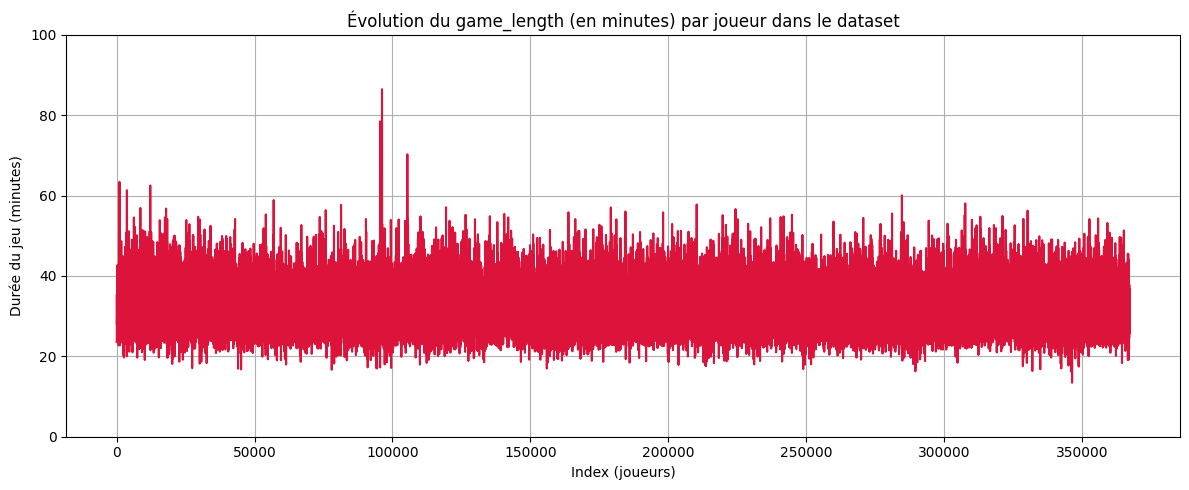

In [13]:
full_data_wards_cleaned['game_length_min'] = full_data_wards_cleaned['game_length'] / 60

# Plot brut de l'évolution du game_length
plt.figure(figsize=(12, 5))
plt.plot(full_data_wards_cleaned['game_length_min'].values, linestyle='-', marker='', color='crimson')
plt.title("Évolution du game_length (en minutes) par joueur dans le dataset")
plt.xlabel("Index (joueurs)")
plt.ylabel("Durée du jeu (minutes)")
plt.ylim(0, 100)
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
full_data_length_time_cleaned = full_data_wards_cleaned
full_data_length_time_cleaned.head(10)

,game_id,player_id,player_name,team_id,team_name,team_acronym,role,win,game_length,champion_name,team_kills,tower_kills,inhibitor_kills,dragon_kills,herald_kills,baron_kills,player_kills,player_deaths,player_assists,total_minions_killed,gold_earned,level,total_damage_dealt,total_damage_dealt_to_champions,total_damage_taken,wards_placed,largest_killing_spree,largest_multi_kill,game_length_min
0,15,0,shanji,0,Legend Esport Gaming,LEG,Top,False,1415,Irelia,7,3,0,0,0,0,2,5,1,179,8530,12,99007,7923,15326,8,0,1,23.583333
1,15,1,Demon,1,Bilibili Gaming Junior,BLGJ,Top,True,1415,Vladimir,17,8,1,3,1,1,2,3,6,174,8565,14,100342,10857,16475,11,2,1,23.583333
2,15,2,yanxuan,0,Legend Esport Gaming,LEG,Bot,False,1415,Kai'Sa,7,3,0,0,0,0,2,2,1,227,9613,12,116407,7011,5788,9,0,1,23.583333
3,15,3,Viod,0,Legend Esport Gaming,LEG,Support,False,1415,Lux,7,3,0,0,0,0,0,4,2,19,5442,10,23555,4932,6151,25,0,0,23.583333
4,15,4,HanXuan,1,Bilibili Gaming Junior,BLGJ,Mid,True,1415,Aatrox,17,8,1,3,1,1,4,2,4,188,10125,14,125022,10749,15481,10,3,2,23.583333
5,15,5,Yui,1,Bilibili Gaming Junior,BLGJ,Support,True,1415,Alistar,17,8,1,3,1,1,1,1,11,45,7615,12,27332,2889,8318,25,0,1,23.583333
6,15,6,Chieftain,1,Bilibili Gaming Junior,BLGJ,Jungle,True,1415,Gragas,17,8,1,3,1,1,5,0,5,129,9686,13,121081,7263,18191,19,5,1,23.583333
7,15,7,Virus,1,Bilibili Gaming Junior,BLGJ,Bot,True,1415,Xayah,17,8,1,3,1,1,5,1,3,249,12122,14,147097,9059,8442,9,3,2,23.583333
8,15,8,Assassin,0,Legend Esport Gaming,LEG,Mid,False,1415,Akali,7,3,0,0,0,0,3,5,0,193,9434,13,114025,11373,18390,6,2,1,23.583333
9,15,9,CatJug,0,Legend Esport Gaming,LEG,Jungle,False,1415,Sejuani,7,3,0,0,0,0,0,1,4,167,8511,13,128180,5912,16508,6,0,0,23.583333


## Nettoyage de datas relatives au level d'un joueur

In [15]:
# Créer un masque pour les joueurs de niveau anormalement bas
mask_low_level = full_data_length_time_cleaned['level'] < 6

# Extraire les index des lignes concernées
low_level_indexes = full_data_length_time_cleaned[mask_low_level].index.tolist()

# Afficher les résultats
print(f"Nombre de joueurs avec un niveau < 6 : {len(low_level_indexes)}")
print("Index des joueurs concernés :", low_level_indexes)


Nombre de joueurs avec un niveau < 6 : 4
Index des joueurs concernés : [28800, 273368, 274717, 346486]


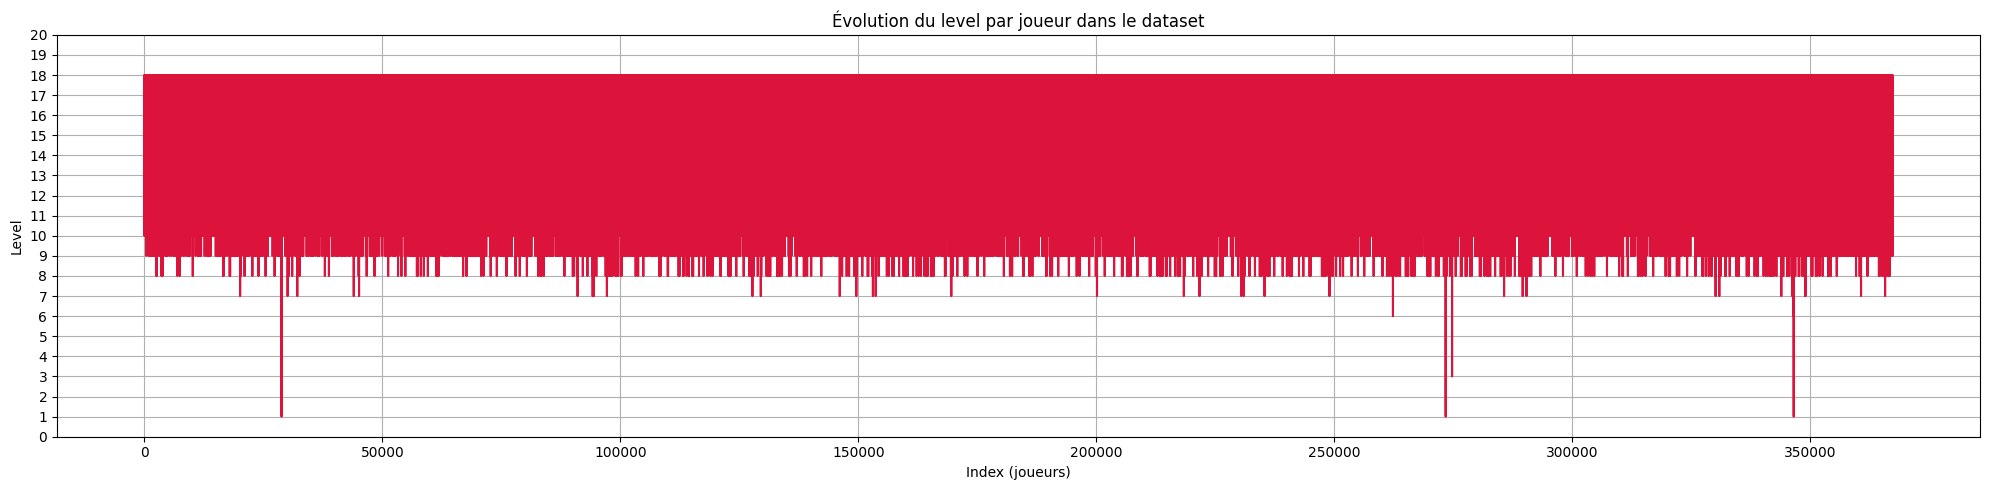

In [16]:
plt.figure(figsize=(20, 5))
plt.plot(full_data_length_time_cleaned['level'].values, linestyle='-', marker='', color='crimson')
plt.title("Évolution du level par joueur dans le dataset")
plt.xlabel("Index (joueurs)")
plt.ylabel("Level")

# Limites de l'axe Y et pas de 1
plt.ylim(0, 20)
plt.gca().yaxis.set_major_locator(MultipleLocator(1))

plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
pd.set_option('display.max_columns', None)  # Affiche toutes les colonnes

# Index des joueurs à faible niveau
low_level_indexes = [28800, 273368, 274717, 346486]

# Affichage des lignes
full_data_length_time_cleaned.loc[low_level_indexes]

,game_id,player_id,player_name,team_id,team_name,team_acronym,role,win,game_length,champion_name,team_kills,tower_kills,inhibitor_kills,dragon_kills,herald_kills,baron_kills,player_kills,player_deaths,player_assists,total_minions_killed,gold_earned,level,total_damage_dealt,total_damage_dealt_to_champions,total_damage_taken,wards_placed,largest_killing_spree,largest_multi_kill,game_length_min
28800,3735,1404,PesE,234,YDN Gamers,YDN,Top,False,1466,Gangplank,7,0,0,2,0,0,0,0,0,0,3267,1,0,0,0,0,0,0,24.433333
273368,27467,1745,TasteLess,485,Cyber Wolves,CWE,Support,False,1389,Rakan,5,0,0,1,0,0,0,0,0,0,3111,1,0,0,0,0,0,0,23.15
274717,27475,3936,Gorilla,674,Ankora Gaming,ANK,Support,False,1527,Alistar,13,4,0,0,1,0,0,0,0,4,4144,3,2503,423,1275,1,0,0,25.45
346486,34093,788,Gunkrab,35,MAMMOTH,MEC,Bot,False,806,Kai'Sa,7,0,0,0,0,0,0,0,0,0,1920,1,0,0,0,0,0,0,13.433333


In [18]:
# Récupérer les game_id des joueurs AFK
afk_indexes = [28800, 273368, 274717, 346486]
afk_game_ids = full_data_length_time_cleaned.loc[afk_indexes, 'game_id'].unique()

# Supprimer toutes les lignes liées à ces parties
full_data_cleaned_no_afk = full_data_length_time_cleaned[~full_data_length_time_cleaned['game_id'].isin(afk_game_ids)].copy()

# Résultat
print(f"Nombre de parties supprimées : {len(afk_game_ids)}")
print(f"Nombre de lignes finales : {len(full_data_cleaned_no_afk)}")


Nombre de parties supprimées : 4
Nombre de lignes finales : 367224


### Nettoyage des datas relatives aux dégâts infligés par joueur

In [19]:
# Filtrer les joueurs avec un total_damage_dealt supérieur à 700 000
mask_high_damage = full_data_cleaned_no_afk['total_damage_dealt'] > 700_000

# Récupérer les index des lignes concernées
high_damage_indexes = full_data_cleaned_no_afk[mask_high_damage].index.tolist()

# Afficher les résultats
print(f"Nombre de joueurs avec plus de 700 000 dégâts : {len(high_damage_indexes)}")

full_data_cleaned_no_afk.loc[ high_damage_indexes]

Nombre de joueurs avec plus de 700 000 dégâts : 25


,game_id,player_id,player_name,team_id,team_name,team_acronym,role,win,game_length,champion_name,team_kills,tower_kills,inhibitor_kills,dragon_kills,herald_kills,baron_kills,player_kills,player_deaths,player_assists,total_minions_killed,gold_earned,level,total_damage_dealt,total_damage_dealt_to_champions,total_damage_taken,wards_placed,largest_killing_spree,largest_multi_kill,game_length_min
975,98,191,Buggax,36,Isurus,ISG,Top,True,3805,Gangplank,21,11,3,4,1,2,4,4,10,439,25121,18,734759,51165,49963,22,3,2,63.416667
1626,144,181,Huni,33,Clutch Gaming,CG,Top,False,2919,Gangplank,25,8,2,4,0,1,7,5,12,464,24788,18,705558,56189,39029,11,4,2,48.65
6199,1757,715,Sangyoon,135,Seorabeol Gaming,SRB,Bot,False,3273,Miss Fortune,15,9,3,4,0,2,5,2,8,619,26943,18,716509,43222,28794,23,3,1,54.55
8543,1309,873,apaMEN,164,Sengoku Gaming,SG,Top,True,3415,Gangplank,9,11,5,3,2,1,1,3,5,490,23892,18,732361,32645,39816,25,0,1,56.916667
11220,1432,621,Sinmivak,22,devils.one,DV1,Top,True,2589,Gangplank,11,7,1,3,1,0,2,0,7,465,21645,18,702885,15787,23745,20,2,1,43.15
12148,2078,896,Emtest,169,Galakticos,GAL,Bot,False,3751,Sivir,32,5,2,3,0,1,17,2,12,616,31833,18,746664,84942,29545,26,8,4,62.516667
15591,1336,519,Jenkins,94,Team Liquid Academy,TLA,Top,True,3233,Gangplank,15,11,4,5,1,2,3,1,8,494,25489,18,716324,45734,34873,28,2,1,53.883333
18296,1716,998,Leza,185,Rainbow7,R7,Mid,True,3251,Viktor,17,8,2,4,1,1,8,1,6,586,26234,18,717653,45818,14921,22,8,2,54.183333
26387,2608,969,Straight,179,Infinity Esports,INF,Top,False,2928,Gangplank,13,3,0,2,1,2,1,2,6,501,23271,18,743413,30990,27002,21,0,1,48.8
141415,15105,1027,Doxy,334,Axolotl,AXL,Top,False,3026,Gangplank,23,9,1,4,1,3,12,3,5,515,27022,18,716608,43824,34997,20,8,5,50.433333


#### Lignes pas corrompues au vu de la durée des games et des autres stats

### Nettoyage des données relatives aux dégâts infligés aux champions adverses par joueur

In [20]:
# Filtrer les joueurs avec un total_damage_dealt supérieur à 700 000
mask_high_damage_champions = full_data_cleaned_no_afk['total_damage_dealt_to_champions'] > 90_000

# Récupérer les index des lignes concernées
high_damage_champions_indexes = full_data_cleaned_no_afk[mask_high_damage_champions].index.tolist()

# Afficher les résultats
print(f"Nombre de joueurs avec plus de 90 000 dégâts aux champions : {len(high_damage_champions_indexes)}")

full_data_cleaned_no_afk.loc[ high_damage_champions_indexes]

Nombre de joueurs avec plus de 90 000 dégâts aux champions : 10


,game_id,player_id,player_name,team_id,team_name,team_acronym,role,win,game_length,champion_name,team_kills,tower_kills,inhibitor_kills,dragon_kills,herald_kills,baron_kills,player_kills,player_deaths,player_assists,total_minions_killed,gold_earned,level,total_damage_dealt,total_damage_dealt_to_champions,total_damage_taken,wards_placed,largest_killing_spree,largest_multi_kill,game_length_min
126500,12262,2232,Megumiin,159,AXIZ CREST,AXZ,Mid,True,3313,Ziggs,30,10,3,5,1,0,6,3,19,366,21048,18,480675,91030,17122,18,3,1,55.216667
203486,19603,510,Upset,6,Fnatic,FNC,Bot,True,3071,Zeri,19,11,4,5,0,3,14,1,1,528,27051,18,563343,92366,35188,21,13,2,51.183333
207362,20783,229,JackeyLove,62,Top Esports,TES,Bot,True,3061,Zeri,22,9,1,3,0,3,15,2,4,500,27158,18,501506,92113,44850,22,11,4,51.016667
286855,29295,1139,Scuro,364,KaBuM! Academy,KBM.A,Bot,True,3009,Kai'Sa,20,10,1,3,1,1,7,3,12,458,22167,18,545252,100158,23236,30,6,2,50.15
307227,32514,2023,Piwek,121,IZI Dream,IZI,Bot,True,2754,Smolder,29,10,2,4,0,2,20,5,4,516,26584,18,624803,92256,26700,16,9,4,45.9
307726,30241,1166,Neon,128,SK Gaming Prime,SKP,Bot,True,3482,Smolder,23,8,1,2,1,0,12,3,6,614,28413,18,880083,96462,50858,16,9,3,58.033333
322684,33220,2023,Piwek,121,IZI Dream,IZI,Bot,True,2585,Smolder,30,10,2,2,0,2,20,5,5,390,24678,18,458568,95757,35581,17,14,5,43.083333
330339,34825,758,JaVaaa,818,FALKE Esports,FLK,Bot,True,3375,Caitlyn,41,8,2,2,1,2,21,7,15,441,29035,18,612976,91030,48017,17,8,3,56.25
340860,35921,3003,HawHaw,776,Esprit Shōnen,ES,Mid,False,2842,Hwei,24,6,1,1,1,1,9,2,11,480,22443,18,506664,102344,19180,16,5,2,47.366667
353705,36504,4802,Afriibi,491,mCon esports,MCN,Bot,False,2521,Smolder,12,2,0,1,0,2,7,3,3,466,21376,18,545814,90360,26294,15,5,3,42.016667


Ces lignes sont conservées car les dégâts élevés sont cohérents avec la durée des parties (42–58 min), le niveau maximal des joueurs (18), et les champions joués (poke mages et hyper-carries scaling), ce qui rend ces performances exceptionnelles mais réalistes.

### Nettoyages des datas relatives aux dégâts subis par joueur

In [21]:
# Filtrer les joueurs avec un total_damage_dealt supérieur à 700 000
mask_high_damage_taken = full_data_cleaned_no_afk['total_damage_taken'] > 90_000

# Récupérer les index des lignes concernées
high_damage_taken_indexes = full_data_cleaned_no_afk[mask_high_damage_taken].index.tolist()

# Afficher les résultats
print(f"Nombre de joueurs avec plus de 90 000 dégâts subis : {len(high_damage_taken_indexes)}")

full_data_cleaned_no_afk.loc[ high_damage_taken_indexes]

Nombre de joueurs avec plus de 90 000 dégâts subis : 10


,game_id,player_id,player_name,team_id,team_name,team_acronym,role,win,game_length,champion_name,team_kills,tower_kills,inhibitor_kills,dragon_kills,herald_kills,baron_kills,player_kills,player_deaths,player_assists,total_minions_killed,gold_earned,level,total_damage_dealt,total_damage_dealt_to_champions,total_damage_taken,wards_placed,largest_killing_spree,largest_multi_kill,game_length_min
800,80,65,Th3Antonio,13,Vodafone Giants.Spain,VGIA,Top,False,3012,Sion,21,4,0,4,1,3,3,9,11,270,15073,18,207165,16170,90073,26,0,1,50.2
322685,33220,2448,NuQ,466,Joblife,JL,Top,False,2585,Renekton,31,6,0,4,1,2,6,8,10,291,16287,18,280130,52387,91096,13,3,1,43.083333
330340,34825,2767,ManoloGap,818,FALKE Esports,FLK,Top,True,3375,Skarner,41,8,2,2,1,2,4,9,26,275,19439,18,260679,38796,92336,16,0,1,56.25
330345,34825,2192,TamoZ,780,Oxygen Gaming,O2K,Top,False,3375,Zac,37,11,4,5,0,2,5,11,16,251,17132,18,230969,32054,93407,7,3,1,56.25
346757,34871,4737,leao1,744,Heracles Gaming,HG,Jungle,True,2767,Ornn,40,10,3,3,1,3,4,9,18,204,15342,18,308702,23601,99920,7,2,1,46.116667
347775,36067,3398,Kozi,771,Back2TheGame,B2G,Top,True,2431,Dr. Mundo,21,8,1,4,0,1,2,7,10,322,16243,18,309585,39028,90555,17,0,1,40.516667
349674,34541,2633,BrokenSword,790,OGC Esports,OSE,Top,False,2135,Dr. Mundo,19,5,0,0,1,1,2,1,9,308,15097,18,243983,30250,94517,9,2,1,35.583333
352439,35787,519,Jenkins,647,Team Liquid Challengers,TLC,Top,True,2653,Dr. Mundo,34,9,2,5,0,2,6,2,19,364,19249,18,350399,44189,101235,18,5,1,44.216667
353704,36504,2022,Rayzorac,670,ZennIT,ZNT,Top,True,2521,Dr. Mundo,30,11,5,5,1,1,11,1,9,393,22289,18,404969,57001,95442,13,9,2,42.016667
365263,36845,554,BrokenBlade,50,G2 Esports,G2,Top,True,3080,Dr. Mundo,20,11,4,5,1,3,4,4,7,411,20750,18,419043,39510,124663,21,2,1,51.333333


Les dégâts subis élevés sont cohérents avec des champions tanks (Sion, Zac, Dr. Mundo, etc.), des rôles front-line (Top/Jungle) et des parties longues, ce qui rend ces valeurs réalistes et justifie leur conservation.

## Visualisation des datas modifiées

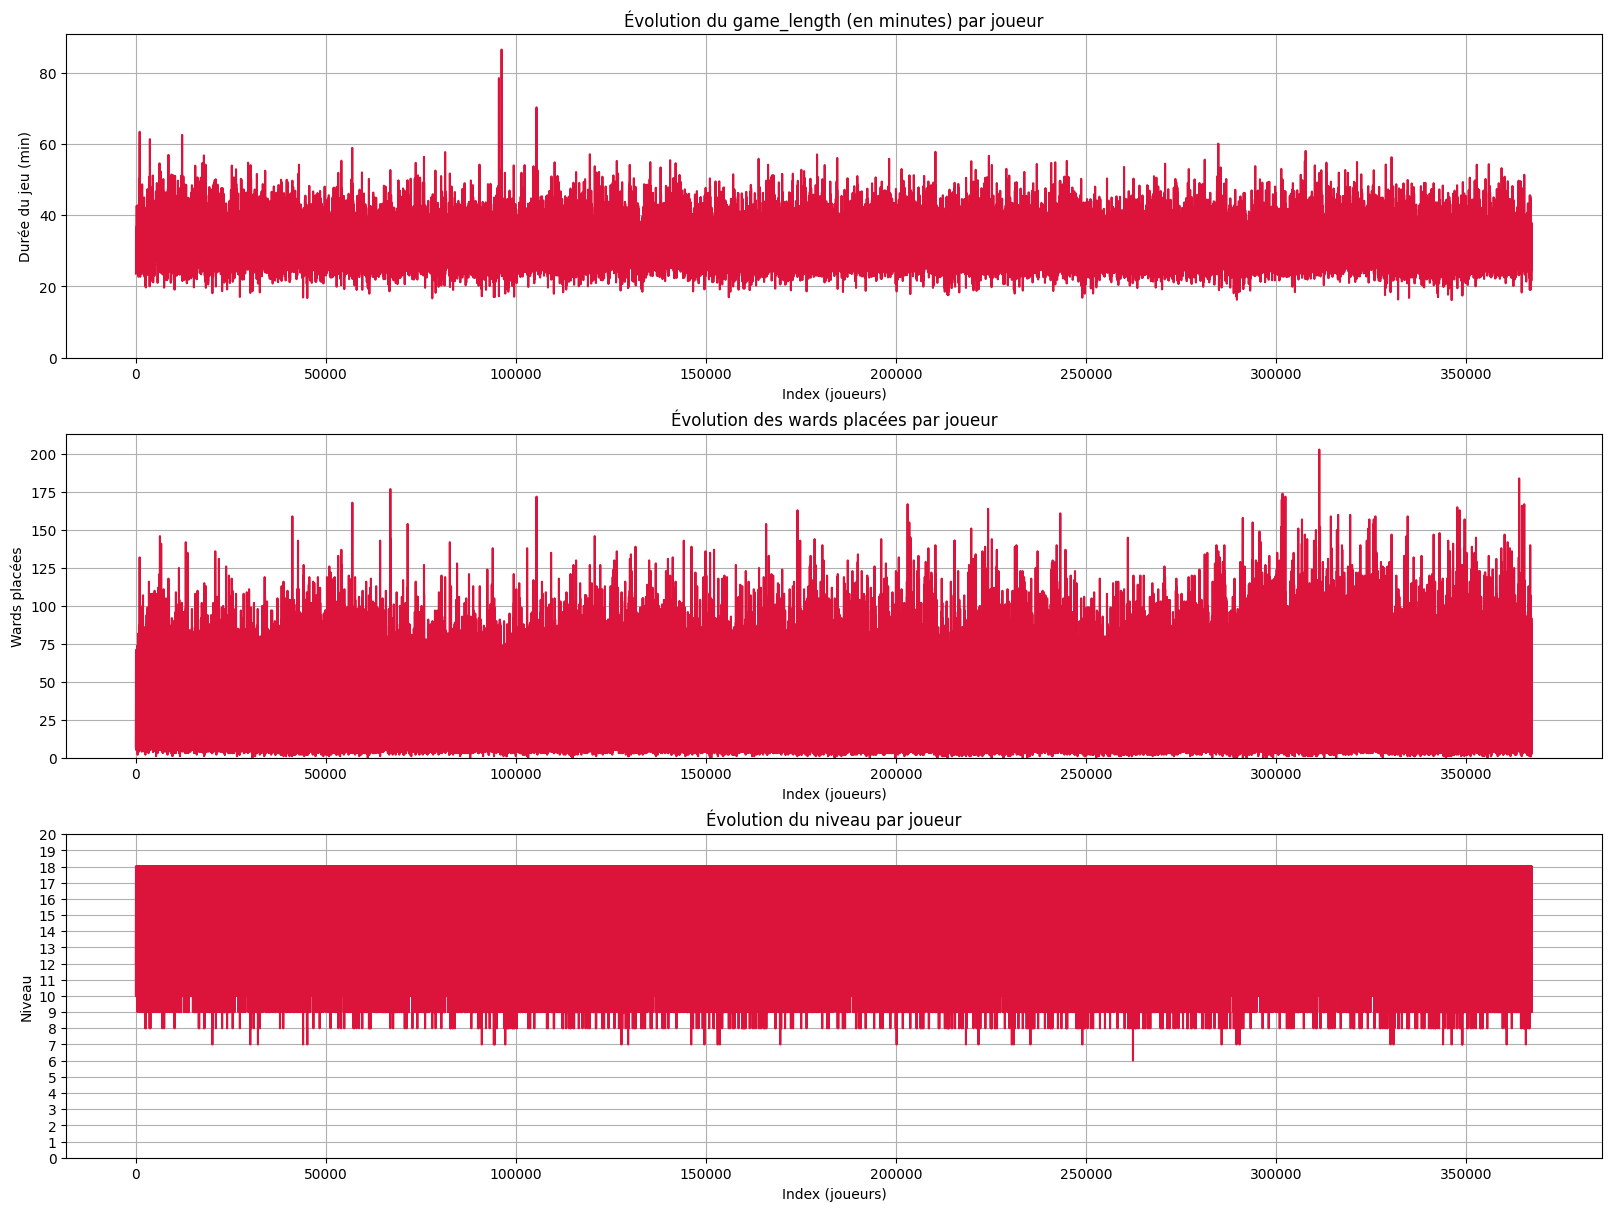

In [22]:
fig, axs = plt.subplots(3, 1, figsize=(16, 12), constrained_layout=True)

# --- 1. game_length_min ---
axs[0].plot(full_data_cleaned_no_afk['game_length_min'].values, color='crimson')
axs[0].set_title("Évolution du game_length (en minutes) par joueur")
axs[0].set_xlabel("Index (joueurs)")
axs[0].set_ylabel("Durée du jeu (min)")
axs[0].set_ylim(0, full_data_cleaned_no_afk['game_length_min'].max() * 1.05)
axs[0].grid(True)

# --- 2. wards_placed ---
axs[1].plot(full_data_cleaned_no_afk['wards_placed'].values, color='crimson')
axs[1].set_title("Évolution des wards placées par joueur")
axs[1].set_xlabel("Index (joueurs)")
axs[1].set_ylabel("Wards placées")
axs[1].set_ylim(0, full_data_cleaned_no_afk['wards_placed'].max() * 1.05)
axs[1].grid(True)

# --- 3. level ---
axs[2].plot(full_data_cleaned_no_afk['level'].values, color='crimson')
axs[2].set_title("Évolution du niveau par joueur")
axs[2].set_xlabel("Index (joueurs)")
axs[2].set_ylabel("Niveau")
axs[2].set_ylim(0, 20)
axs[2].yaxis.set_major_locator(MultipleLocator(1))
axs[2].grid(True)

plt.show()

## Categorical encoding

In [23]:

full_data_cleaned_no_afk['win'] = full_data_cleaned_no_afk['win'].astype(int)

In [24]:
full_data_cleaned_no_afk.isna().sum()


game_id                              0
player_id                            0
player_name                          0
team_id                              0
team_name                            0
team_acronym                       290
role                                 0
win                                  0
game_length                          0
champion_name                        0
team_kills                           0
tower_kills                          0
inhibitor_kills                      0
dragon_kills                         0
herald_kills                         0
baron_kills                          0
player_kills                         0
player_deaths                        0
player_assists                       0
total_minions_killed                 0
gold_earned                          0
level                                0
total_damage_dealt                   0
total_damage_dealt_to_champions      0
total_damage_taken                   0
wards_placed             

In [25]:
full_data_cleaned_no_afk.head(10)

,game_id,player_id,player_name,team_id,team_name,team_acronym,role,win,game_length,champion_name,team_kills,tower_kills,inhibitor_kills,dragon_kills,herald_kills,baron_kills,player_kills,player_deaths,player_assists,total_minions_killed,gold_earned,level,total_damage_dealt,total_damage_dealt_to_champions,total_damage_taken,wards_placed,largest_killing_spree,largest_multi_kill,game_length_min
0,15,0,shanji,0,Legend Esport Gaming,LEG,Top,0,1415,Irelia,7,3,0,0,0,0,2,5,1,179,8530,12,99007,7923,15326,8,0,1,23.583333
1,15,1,Demon,1,Bilibili Gaming Junior,BLGJ,Top,1,1415,Vladimir,17,8,1,3,1,1,2,3,6,174,8565,14,100342,10857,16475,11,2,1,23.583333
2,15,2,yanxuan,0,Legend Esport Gaming,LEG,Bot,0,1415,Kai'Sa,7,3,0,0,0,0,2,2,1,227,9613,12,116407,7011,5788,9,0,1,23.583333
3,15,3,Viod,0,Legend Esport Gaming,LEG,Support,0,1415,Lux,7,3,0,0,0,0,0,4,2,19,5442,10,23555,4932,6151,25,0,0,23.583333
4,15,4,HanXuan,1,Bilibili Gaming Junior,BLGJ,Mid,1,1415,Aatrox,17,8,1,3,1,1,4,2,4,188,10125,14,125022,10749,15481,10,3,2,23.583333
5,15,5,Yui,1,Bilibili Gaming Junior,BLGJ,Support,1,1415,Alistar,17,8,1,3,1,1,1,1,11,45,7615,12,27332,2889,8318,25,0,1,23.583333
6,15,6,Chieftain,1,Bilibili Gaming Junior,BLGJ,Jungle,1,1415,Gragas,17,8,1,3,1,1,5,0,5,129,9686,13,121081,7263,18191,19,5,1,23.583333
7,15,7,Virus,1,Bilibili Gaming Junior,BLGJ,Bot,1,1415,Xayah,17,8,1,3,1,1,5,1,3,249,12122,14,147097,9059,8442,9,3,2,23.583333
8,15,8,Assassin,0,Legend Esport Gaming,LEG,Mid,0,1415,Akali,7,3,0,0,0,0,3,5,0,193,9434,13,114025,11373,18390,6,2,1,23.583333
9,15,9,CatJug,0,Legend Esport Gaming,LEG,Jungle,0,1415,Sejuani,7,3,0,0,0,0,0,1,4,167,8511,13,128180,5912,16508,6,0,0,23.583333


# Model Comparison and Hyperparameter Selection

## 1. Préparation des données

In [26]:
dataset_cleaned = full_data_cleaned_no_afk
# Filtrer les ADC
df_adc = dataset_cleaned[dataset_cleaned['role'] == 'Bot'].copy()

# Calculer les features dérivées
df_adc['KDA'] = (df_adc['player_kills'] + df_adc['player_assists']) / np.maximum(df_adc['player_deaths'], 1)
df_adc['gold_per_min'] = df_adc['gold_earned'] / (df_adc['game_length'] / 60)
df_adc['cs_per_min'] = df_adc['total_minions_killed'] / (df_adc['game_length'] / 60)
df_adc['damage_taken_per_min'] = df_adc['total_damage_taken'] / (df_adc['game_length'] / 60)
df_adc['damage_dealt_per_min'] = df_adc['total_damage_dealt'] / (df_adc['game_length'] / 60)
df_adc['damage_champions_per_min'] = df_adc['total_damage_dealt_to_champions'] / (df_adc['game_length'] / 60)

# Sélection des features finales
features = [
    'gold_per_min', 'cs_per_min', 'KDA', 'damage_champions_per_min', 'damage_dealt_per_min', 'damage_taken_per_min',
    'largest_killing_spree', 'largest_multi_kill',
    'wards_placed', 'level'
]
X = df_adc[features]
y = df_adc['win']

# Split train / val / test (60% / 20% / 20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

In [27]:
X.head(10)

,gold_per_min,cs_per_min,KDA,damage_champions_per_min,damage_dealt_per_min,damage_taken_per_min,largest_killing_spree,largest_multi_kill,wards_placed,level
2,407.618375,9.625442,1.500000,297.286219,4935.985866,245.427562,0,1,9,12
7,514.007067,10.558304,8.000000,384.127208,6237.328622,357.964664,3,2,9,14
15,434.422535,9.971831,3.000000,458.704225,7213.830986,497.605634,2,1,11,16
19,481.577465,9.464789,12.000000,553.859155,6924.647887,427.183099,6,2,14,17
23,335.943229,7.735068,1.000000,237.8356,4322.625665,493.092844,0,1,9,13
28,476.487286,9.012419,5.000000,651.200473,6781.845062,446.611473,2,2,9,15
33,391.283582,8.507463,3.000000,739.402985,5906.029851,403.671642,2,1,12,16
37,462.298507,8.626866,2.666667,618.119403,6671.283582,696.955224,4,2,11,16
46,473.116499,9.296274,2.666667,395.623891,6182.199882,374.902425,3,2,14,15
47,471.235955,10.325251,3.500000,444.872856,6497.918391,528.07806,0,1,11,14


## 2. Test des différents nombres d'arbres (n_estimators)

In [28]:
n_estimators_range = [1,10, 50, 100, 150, 200]
train_accuracies = []
val_accuracies = []

for n in n_estimators_range:
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)

    train_pred = model.predict(X_train)
    val_pred = model.predict(X_val)

    train_accuracies.append(accuracy_score(y_train, train_pred))
    val_accuracies.append(accuracy_score(y_val, val_pred))


## 3. Visualisation des accuracies train et validation

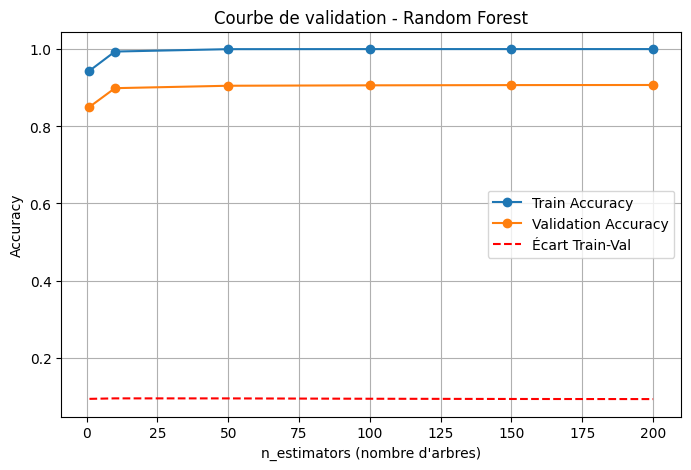

Écart maximum entre train et validation : 0.0949


In [29]:
plt.figure(figsize=(8,5))

# Courbes classiques
plt.plot(n_estimators_range, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(n_estimators_range, val_accuracies, label='Validation Accuracy', marker='o')

# Courbe de l'écart
gap = [abs(train - val) for train, val in zip(train_accuracies, val_accuracies)]
plt.plot(n_estimators_range, gap, label='Écart Train-Val', linestyle='--', color='red')

# Mise en forme
plt.title("Courbe de validation - Random Forest")
plt.xlabel("n_estimators (nombre d'arbres)")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

print(f"Écart maximum entre train et validation : {max(gap):.4f}")


## 4. Entraînement final avec le meilleur n_estimators

In [30]:
n_estimators_chosen = 25
# Tester différentes profondeurs d’arbre
max_depth_range = [3, 5, 7, 9, 11, 13, 15, 17, 20]
train_scores = []
val_scores = []

for depth in max_depth_range:
    model = RandomForestClassifier(n_estimators=n_estimators_chosen, max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    train_scores.append(accuracy_score(y_train, model.predict(X_train)))
    val_scores.append(accuracy_score(y_val, model.predict(X_val)))


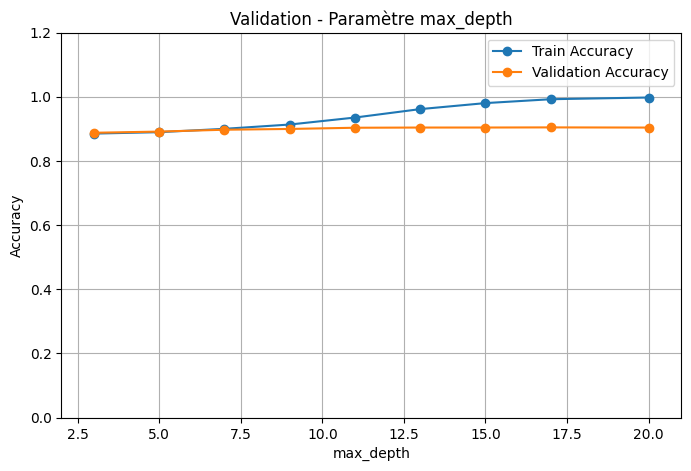

In [31]:
plt.figure(figsize=(8,5))
plt.plot(max_depth_range, train_scores, marker='o', label='Train Accuracy')
plt.plot(max_depth_range, val_scores, marker='o', label='Validation Accuracy')
plt.title("Validation - Paramètre max_depth")
plt.xlabel("max_depth")
plt.xlim(2, 21)
plt.ylabel("Accuracy")
plt.ylim(0, 1.2)
plt.legend()
plt.grid(True)
plt.show()

In [32]:
max_depth_chosen = 9

final_model = RandomForestClassifier(n_estimators=n_estimators_chosen, max_depth=max_depth_chosen, random_state=42)
final_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=9, n_estimators=25, random_state=42)

## 5. Évaluation finale sur le jeu de test

Accuracy sur le jeu de test : 0.8971


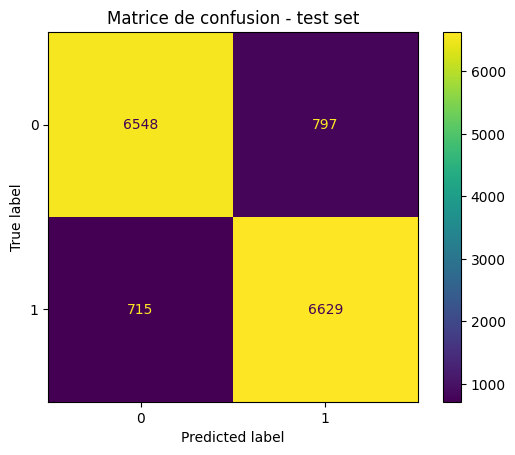

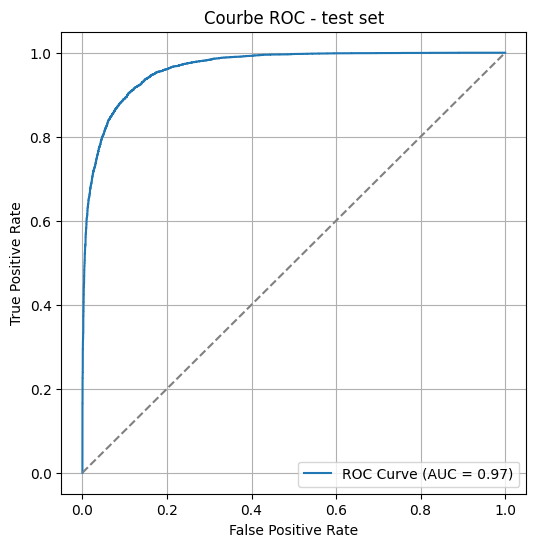

In [33]:
# Prédictions sur test
y_pred = final_model.predict(X_test)

# Score accuracy en chiffre
acc_test = accuracy_score(y_test, y_pred)
print(f"Accuracy sur le jeu de test : {acc_test:.4f}")

# Matrice de confusion
ConfusionMatrixDisplay.from_estimator(final_model, X_test, y_test)
plt.title("Matrice de confusion - test set")
plt.show()

# Courbe ROC
y_scores = final_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Courbe ROC - test set")
plt.legend()
plt.grid(True)
plt.show()



## Interprétation du modèle avec SHAP (SHapley Values)

In [34]:
# Créer l'explainer SHAP pour un modèle arbre
explainer = shap.TreeExplainer(final_model)
shap_values = explainer.shap_values(X_val)


<class 'numpy.ndarray'>
shap_values est un tableau avec shape: (14688, 10, 2)


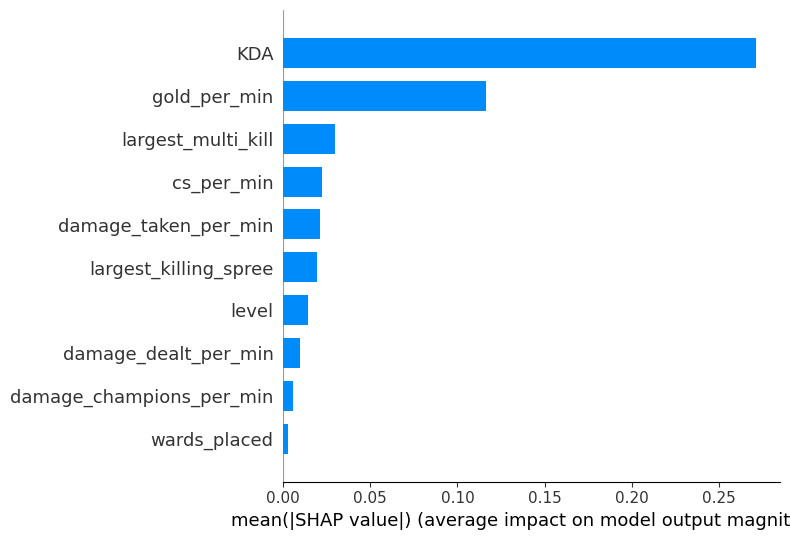

In [35]:
print(type(shap_values))
if isinstance(shap_values, list):
    print("shap_values est une liste avec longueur :", len(shap_values))
    print("Forme de shap_values[0]:", shap_values[0].shape)
    print("Forme de X_val:", X_val.shape)
else:
    print("shap_values est un tableau avec shape:", shap_values.shape)

# Extraire les shap_values pour la classe 1 (victoire)
shap_values_class1 = shap_values[:, :, 1]

# Afficher le summary plot
shap.summary_plot(shap_values_class1, X_val, plot_type="bar")


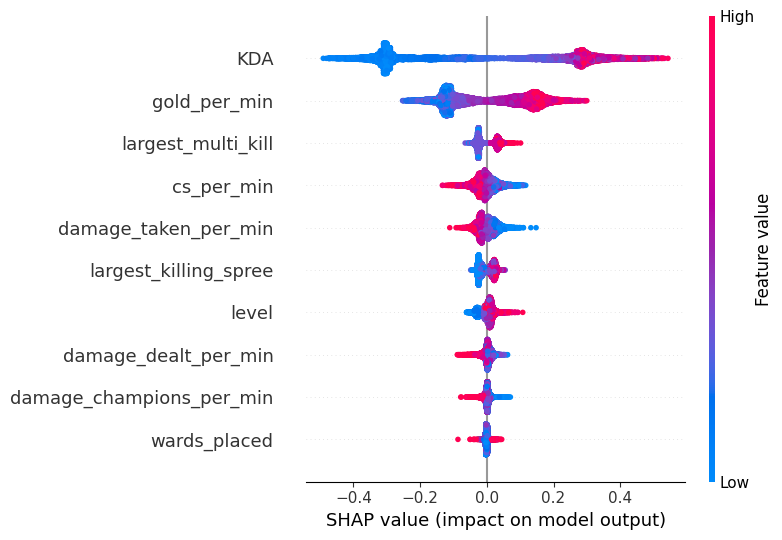

In [36]:
# Plot détaillé avec distribution
shap.summary_plot(shap_values_class1, X_val)
